In [1]:
#function to test models 
import nest_asyncio
import warnings
from mb_utils.src.logging import logger

nest_asyncio.apply()
warnings.filterwarnings("ignore")

In [2]:
from mb_pytorch.utils.version import version
version

'1.2.29'

In [3]:
from mb_pytorch.dataloader.loader import DataLoader

k = DataLoader('../scripts/detection/object_detection.yaml',logger=logger)
k_data = k.data_dict['data']
model_data_dict = k.data_dict['model']

Thu 02:23:16,940 INF Read data from yaml file: [{'data': {'file': {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dat


In [4]:
from mb_pytorch.training.train_params import train_helper
model_yaml_data = k.data_dict['model']
loss_attr,optimizer_attr,optimizer_dict,scheduler_attr,scheduler_dict = train_helper(model_yaml_data) 

In [5]:
from torch.utils.tensorboard import SummaryWriter
import os

path_logs = os.path.join(os.path.split(k_data['file']['root'])[0], 'logs')
writer = SummaryWriter(log_dir=path_logs)


In [6]:
train_loader,val_loader,train_dataset,test_dataset = k.data_load()


50row [00:00, 25435.44row/s]
Thu 02:23:17,017 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Thu 02:23:17,019 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Thu 02:23:17,020 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Thu 02:23:17,022 INF Data will be split into train and validation according to train_file input : True                               
Thu 02:23:17,023 INF If unnamed columns are present, they will be removed.                                                           
Thu 02:23:17,025 INF If duplicate rows are present, they will be removed.                                                            
Thu 02:23:17,028 INF Length of data after removing invalid paths: 50                                                                 
Thu 02:23:17,029 INF Skipping ima

In [7]:
train_dataset.__getitem__(0)

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [8]:
test_dataset.__getitem__(4)

(tensor([[[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ...,

In [9]:
from mb_pytorch.models.modelloader import ModelLoader
model_data_load = ModelLoader(k.data_dict['model'])
model =  model_data_load.get_model()

Thu 02:23:17,728 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   


In [10]:
from mb_pytorch.detection.training import detection_train_loop


Thu 02:23:55,409 INF Training loop Starting                                                                                          
Thu 02:23:55,744 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   
Thu 02:23:55,746 INF Model Loaded                                                                                                    
50row [00:00, 35538.93row/s]
Thu 02:23:55,750 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Thu 02:23:55,752 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Thu 02:23:55,753 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Thu 02:23:55,755 INF Data will be split into train and validation according to train_file input : True                               
Thu 02:23:55,757 INF If unnamed c

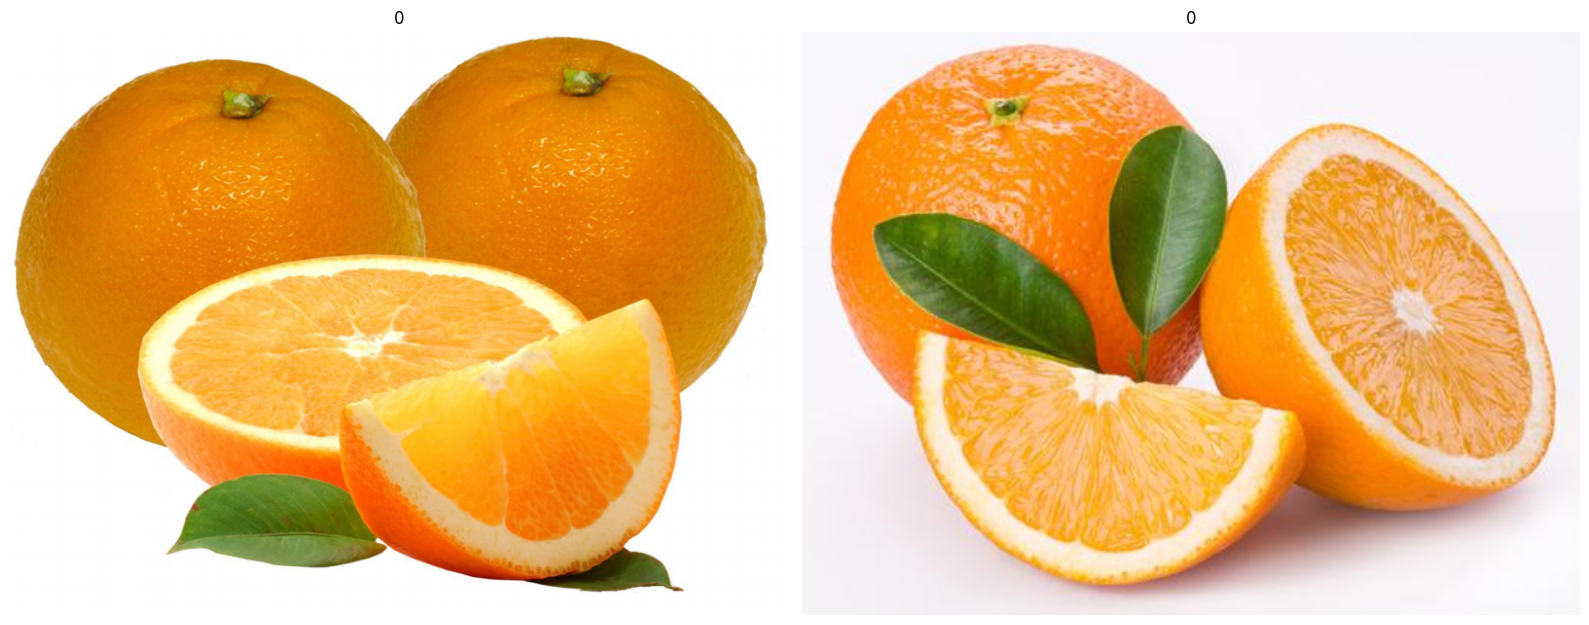

Thu 02:28:01,179 INF Epoch 1 - Best Model Saved (Val Loss: 0.0578)                                                                   
Epochs:  33%|███▎      | 1/3 [04:05<08:10, 245.37s/it]Thu 02:28:01,182 INF Training Started                                                                                                

Training:   0%|          | 0/7 [00:00<?, ?it/s]Thu 02:28:29,048 INF Epoch 2 - Batch 1 - Train Loss: 0.2048870027065277                                                              

Training:  14%|█▍        | 1/7 [00:27<02:47, 27.87s/it]Thu 02:28:55,218 INF Epoch 2 - Batch 2 - Train Loss: 0.23144786059856415                                                             

Training:  29%|██▊       | 2/7 [00:54<02:14, 26.87s/it]Thu 02:29:20,463 INF Epoch 2 - Batch 3 - Train Loss: 0.1584613025188446                                                              

Training:  43%|████▎     | 3/7 [01:19<01:44, 26.13s/it]Thu 02:29:46,123 INF Epoch 2 - Batch 4 - Train Loss: 0.14451

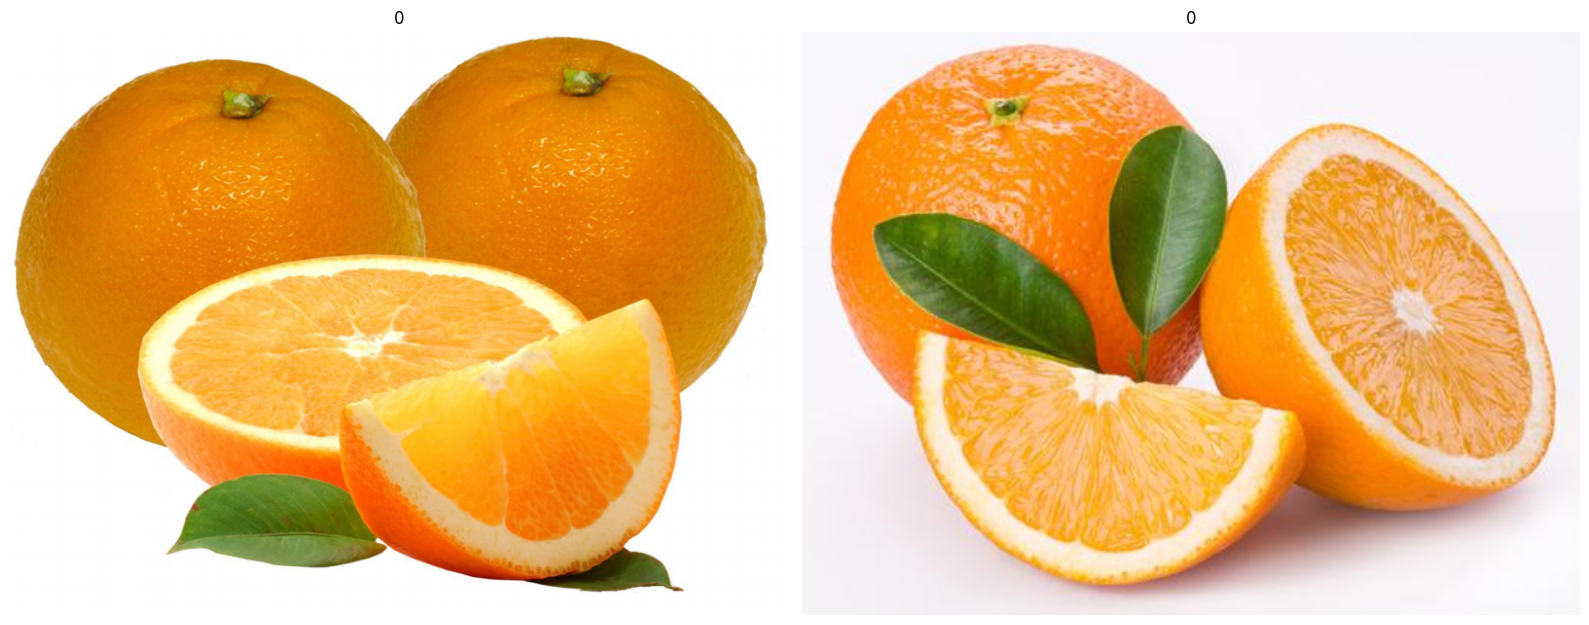

Thu 02:31:52,924 INF Epoch 2 - Best Model Saved (Val Loss: 0.0298)                                                                   
Epochs:  67%|██████▋   | 2/3 [07:57<03:57, 237.35s/it]Thu 02:31:52,927 INF Training Started                                                                                                

Training:   0%|          | 0/7 [00:00<?, ?it/s]Thu 02:32:20,072 INF Epoch 3 - Batch 1 - Train Loss: 0.19072508811950684                                                             

Training:  14%|█▍        | 1/7 [00:27<02:42, 27.15s/it]Thu 02:32:46,086 INF Epoch 3 - Batch 2 - Train Loss: 0.22121264040470123                                                             

Training:  29%|██▊       | 2/7 [00:53<02:12, 26.48s/it]Thu 02:33:13,038 INF Epoch 3 - Batch 3 - Train Loss: 0.16114255785942078                                                             

Training:  43%|████▎     | 3/7 [01:20<01:46, 26.70s/it]Thu 02:33:38,414 INF Epoch 3 - Batch 4 - Train Loss: 0.14746

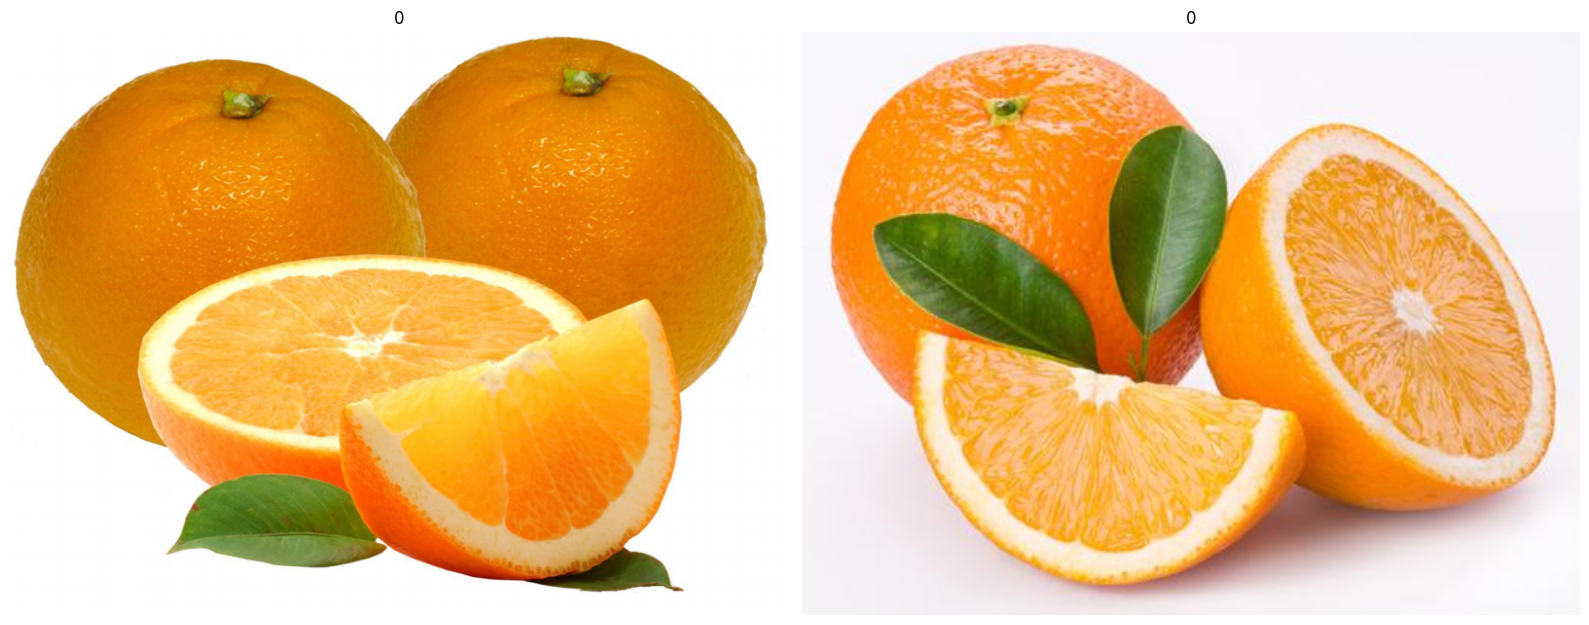

Epochs: 100%|██████████| 3/3 [11:58<00:00, 239.47s/it]


In [12]:
detection_train_loop(k,model_data_dict,writer=writer,logger=logger)

In [ ]:
## tests

In [12]:
k_data_test = k.data_dict['data']
data_model_test = k.data_dict['model']
model_data_load_test = ModelLoader(k.data_dict['model'])
model_test =  model_data_load_test.get_model()
device_type = data_model_test['device']
bbox_threshold = data_model_test['model_meta_data']['model_bbox_threshold']

Thu 01:06:56,077 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   


In [13]:
import torch
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from mb.plt.utils import dynamic_plt
from mb_pytorch.utils.viewer import gradcam_viewer,plot_classes_pred,plot_to_image


In [14]:
train_loader_test,val_loader_test,_,_ = k.data_load()
loss_attr_test,optimizer_attr_test,optimizer_dict_test,scheduler_attr_test,scheduler_dict_test = train_helper(data_model_test) 
optimizer_test = optimizer_attr_test(model_test.parameters(),**optimizer_dict_test)
scheduler_test = None
if scheduler_test is not None:
    scheduler_test = scheduler_attr(optimizer_test,**scheduler_dict)


device = torch.device('cpu')


model_test.to(device)
best_val_loss = float('inf')


50row [00:00, 23185.76row/s]
Thu 01:06:58,215 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Thu 01:06:58,218 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Thu 01:06:58,220 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Thu 01:06:58,223 INF Data will be split into train and validation according to train_file input : True                               
Thu 01:06:58,225 INF If unnamed columns are present, they will be removed.                                                           
Thu 01:06:58,227 INF If duplicate rows are present, they will be removed.                                                            
Thu 01:06:58,232 INF Length of data after removing invalid paths: 50                                                                 
Thu 01:06:58,234 INF Skipping ima

Training: 100%|██████████| 7/7 [02:54<00:00, 20.73s/it]
                                                       
Validation:   0%|          | 0/7 [00:00<?, ?it/s]

Val loss : 1.9082192182540894



Validation:  14%|█▍        | 1/7 [00:12<01:16, 12.74s/it]

Val loss : 3.8164384365081787



Validation:  29%|██▊       | 2/7 [00:24<00:59, 11.93s/it]

Val loss : 5.724657654762268



Validation:  43%|████▎     | 3/7 [00:36<00:48, 12.01s/it]

Val loss : 7.632876873016357



Validation:  57%|█████▋    | 4/7 [00:47<00:35, 11.91s/it]

Val loss : 9.541096091270447



Validation:  71%|███████▏  | 5/7 [00:59<00:23, 11.72s/it]

Val loss : 11.449315309524536



Validation:  86%|████████▌ | 6/7 [01:10<00:11, 11.55s/it]

Val loss : 11.926370114088058



Validation: 100%|██████████| 7/7 [01:12<00:00,  8.52s/it]
                                                         Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


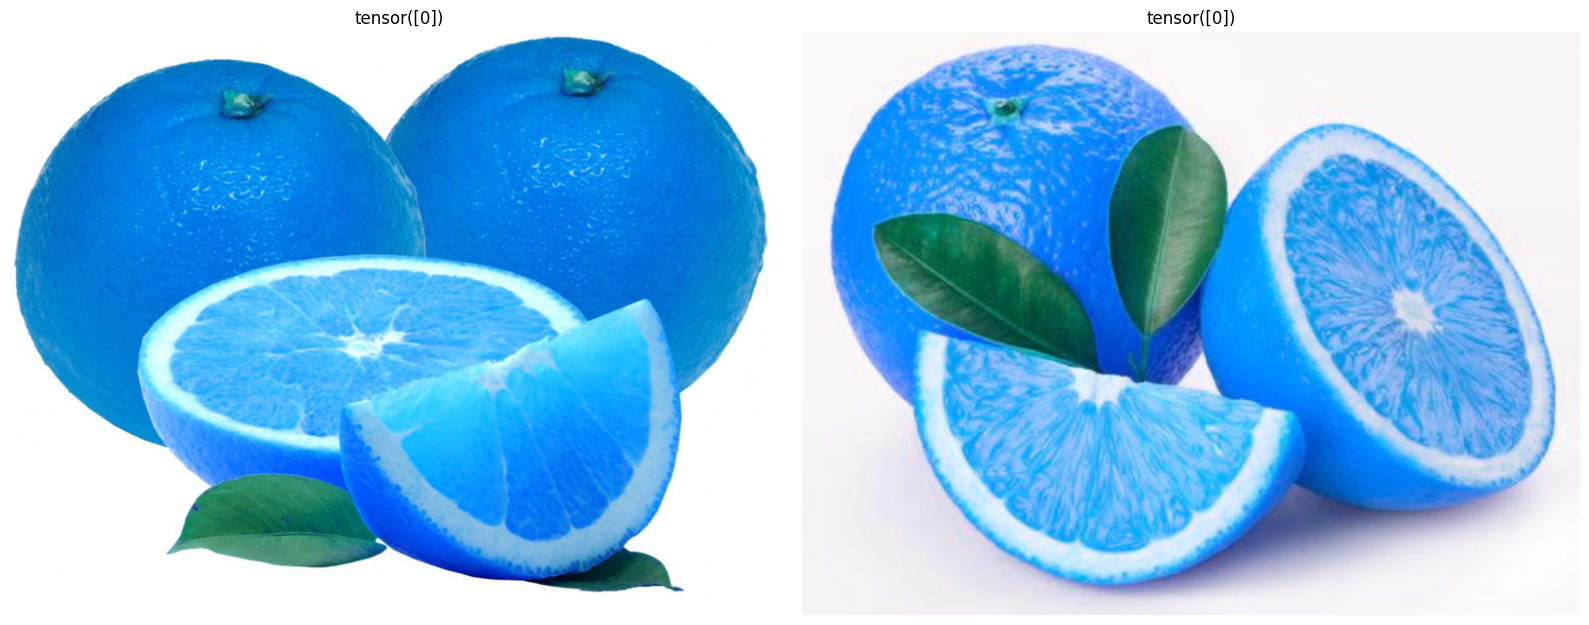

Training: 100%|██████████| 7/7 [02:40<00:00, 19.00s/it]
                                                       
Validation:   0%|          | 0/7 [00:00<?, ?it/s]

Val loss : 0.23544849455356598



Validation:  14%|█▍        | 1/7 [00:12<01:13, 12.27s/it]

Val loss : 0.47089698910713196



Validation:  29%|██▊       | 2/7 [00:22<00:56, 11.30s/it]

Val loss : 0.7063454836606979



Validation:  43%|████▎     | 3/7 [00:33<00:44, 11.09s/it]

Val loss : 0.9417939782142639



Validation:  57%|█████▋    | 4/7 [00:44<00:32, 10.90s/it]

Val loss : 1.17724247276783



Validation:  71%|███████▏  | 5/7 [00:54<00:21, 10.78s/it]

Val loss : 1.4126909673213959



Validation:  86%|████████▌ | 6/7 [01:05<00:10, 10.70s/it]

Val loss : 1.4715530909597874



Validation: 100%|██████████| 7/7 [01:07<00:00,  7.89s/it]
                                                         Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


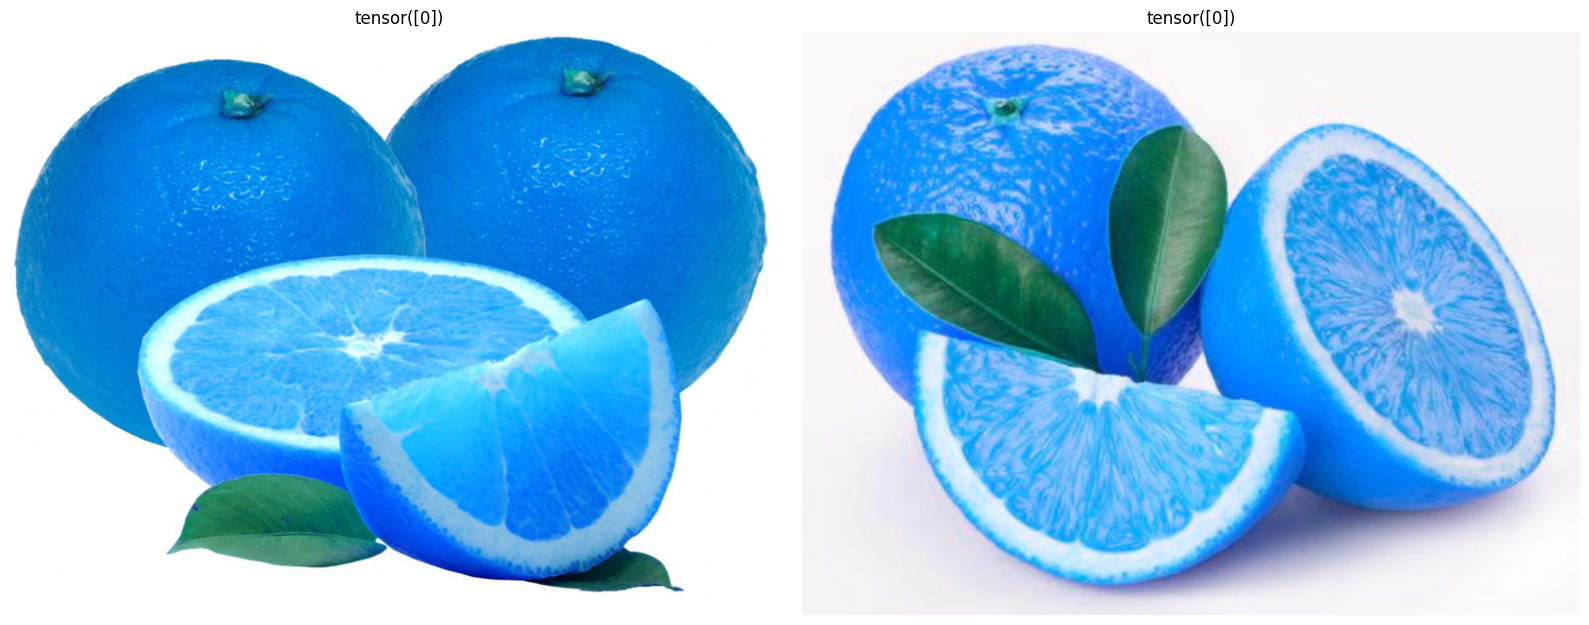

Training: 100%|██████████| 7/7 [02:41<00:00, 19.14s/it]
                                                       
Validation:   0%|          | 0/7 [00:00<?, ?it/s]

Val loss : 0.35187631845474243



Validation:  14%|█▍        | 1/7 [00:11<01:11, 11.99s/it]

Val loss : 0.7037526369094849



Validation:  29%|██▊       | 2/7 [00:24<01:00, 12.04s/it]

Val loss : 1.0556289553642273



Validation:  43%|████▎     | 3/7 [00:35<00:46, 11.64s/it]

Val loss : 1.4075052738189697



Validation:  57%|█████▋    | 4/7 [00:46<00:34, 11.47s/it]

Val loss : 1.7593815922737122



Validation:  71%|███████▏  | 5/7 [00:57<00:22, 11.38s/it]

Val loss : 2.1112579107284546



Validation:  86%|████████▌ | 6/7 [01:09<00:11, 11.66s/it]

Val loss : 2.19922699034214



Validation: 100%|██████████| 7/7 [01:12<00:00,  8.69s/it]
                                                         Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


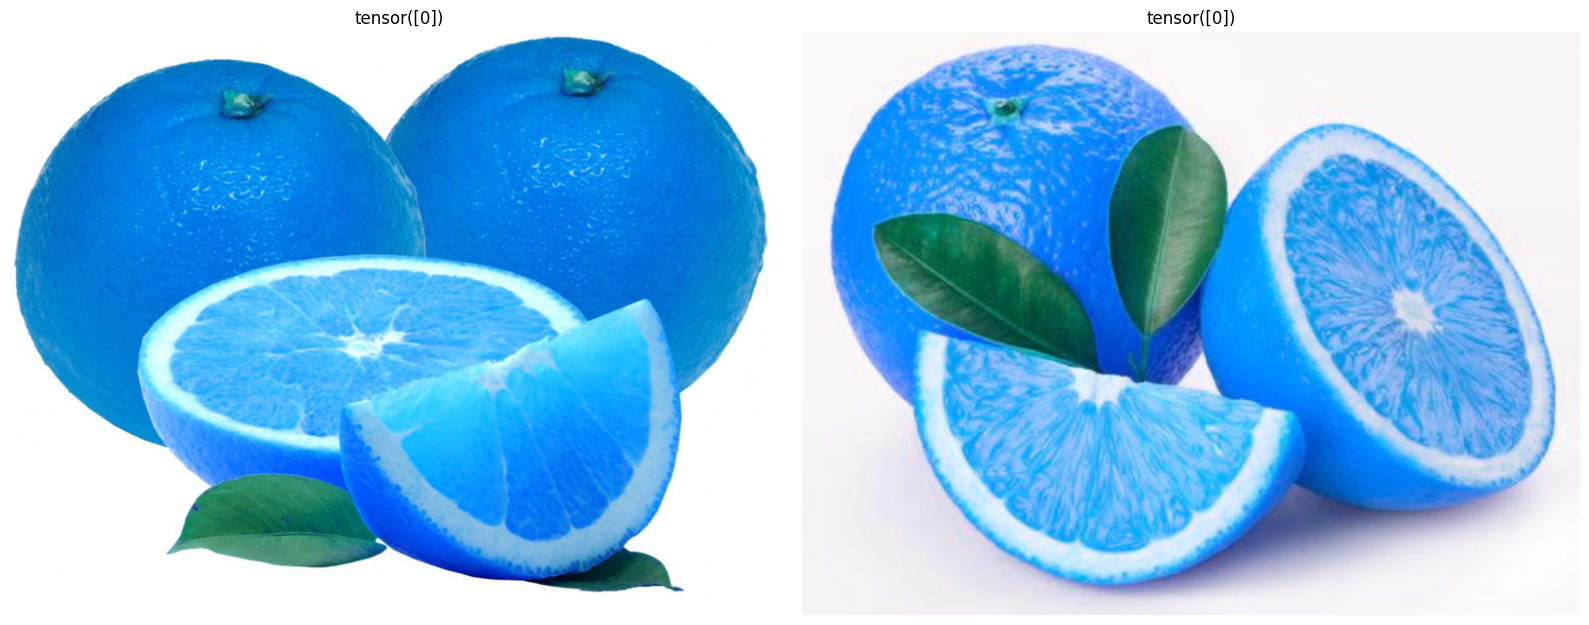

Epochs: 100%|██████████| 3/3 [12:04<00:00, 241.45s/it]


In [16]:
gradcam,gradcam_rgb = None,False
for epoch in tqdm.tqdm(range(data_model_test['model_epochs']), desc="Epochs"):
        
    ##train loop
        
    model_test.train(True)
    train_loss = 0
        

    for batch_idx, data in enumerate(tqdm.tqdm(train_loader_test, desc="Training", leave=False)):
        images,bbox,labels = data.values()
        images = list(image.to(device) for image in images)
        bbox = list(b.to(device) for b in bbox)
        bbox = [b.view(-1, 4) if b.dim() == 1 else b for b in bbox]
        labels = list(label.to(device) for label in labels)  
        targets = [{'boxes': b,'labels': label} for b,label in zip(bbox, labels)]      
                    
        optimizer_test.zero_grad()
        loss_dict_train = model_test(images, targets)
        losses = sum(loss for loss in loss_dict_train.values())
            
        losses.backward()
        optimizer_test.step()
        if scheduler_test is not None:
            scheduler_test.step()
            
        train_loss += losses.item()
    avg_train_loss = train_loss / len(train_loader_test)

    model_test.train(False)

    ## Validation loop
    val_loss = 0
    val_bbox = []
    val_labels = []
    val_scores = []
    val_targets_labels = []
    val_targets_bbox = []

    with torch.no_grad():
        for batch_idx, data in enumerate(tqdm.tqdm(val_loader_test, desc="Validation", leave=False)):
            images,bbox,labels = data.values()
            images = list(image.to(device) for image in images)
            bbox = list(b.to(device) for b in bbox)
            bbox = [b.view(-1, 4) if b.dim() == 1 else b for b in bbox]
            labels = list(label.to(device) for label in labels)  
            targets = [{'boxes': b,'labels': label} for b,label in zip(bbox, labels)]    

            loss_dict = model_test(images, targets)
                
            if len(loss_dict) == 0:
                continue
            else:
                for i in range(len(loss_dict)):
                    if len(loss_dict[i]['boxes']) > 0 :
                        if 'scores' in loss_dict[i]:
                            for j in range(len(loss_dict[i]['scores'])):
                                if loss_dict[i]['scores'][j] > bbox_threshold:
                                    val_bbox.append(loss_dict[i]['boxes'][j])
                                    val_labels.append(loss_dict[i]['labels'][j])
                                    val_scores.append(loss_dict[i]['scores'][j])
                                    if j < 1:
                                        val_targets_labels.append(labels[i])
                                        val_targets_bbox.append(bbox[i])

            #losses = sum(loss for loss in loss_dict.values() if loss.numel()>0)
                
            val_loss += losses.item() * len(images)
            print(f'Val loss : {val_loss}')
        avg_val_loss = val_loss / len(val_loader_test.dataset)
            

    # TensorBoard logging
    if writer is not None:
        writer.add_scalar('Loss/train', avg_train_loss, global_step=epoch)
        writer.add_scalar('Loss/val', avg_val_loss, global_step=epoch)
        writer.add_scalar('Learning_rate', optimizer_test.param_groups[0]['lr'], global_step=epoch)
            
        for name, param in model_test.named_parameters():
            writer.add_histogram(name, param, global_step=epoch)
            
        # Visualizations
        if len(images) > 0:
            img_l = [np.array(i.to('cpu')) for i in images]
            labels_l = [str(list(np.array((l.to('cpu'))))[0]) for l in labels] ##check for multiple labels
            #create_img_grid(x, x, writer, global_step=epoch)
            fig = dynamic_plt(img_l,labels=labels_l,return_fig=True)
            writer.add_image('grid', plot_to_image(fig), global_step=epoch)

            # Grad-CAM visualization 
            if gradcam is not None:
                use_cuda = device != 'cpu'
                for cam_layers in gradcam:
                    grad_img = gradcam_viewer(cam_layers, model, img_l[0].unsqueeze(0), gradcam_rgb=gradcam_rgb, use_cuda=use_cuda) 
                    if grad_img is not None:
                        grad_img = np.transpose(grad_img, (2, 0, 1))
                        writer.add_image(f'Gradcam/{cam_layers}', grad_img, global_step=epoch)

   
    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = model.state_dict()

        path = os.path.join(os.path.dirname(k_data['file']['root']), 'best_model.pth')
        torch.save(best_model, path)

In [113]:
## gradcam test - not working

In [112]:
# from mb_pytorch.utils.viewer import gradcam_viewer

In [111]:
# gradcam_layer = 'model.backbone'
# split_val = gradcam_layer.split('.')[1]
# print(split_val)

In [110]:
# import torch
# images_np = np.array(images[0])
# images_torch = torch.from_numpy(images_np)
# print(images_torch.shape)

In [109]:
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
# from pytorch_grad_cam.utils.model_targets import FasterRCNNBoxScoreTarget
# # targets = [ClassifierOutputTarget(281)]
# targets = [FasterRCNNBoxScoreTarget(labels=labels[0])]



In [108]:
# from mb_pytorch.utils.viewer import new_show_cam_on_image
# from pytorch_grad_cam import GradCAM

# def fasterrcnn_reshape_transform(x):
#     target_size = x['pool'].size()[-2 : ]
#     activations = []
#     for key, value in x.items():
#         activations.append(torch.nn.functional.interpolate(torch.abs(value), target_size, mode='bilinear'))
#     activations = torch.cat(activations, axis=1)
#     return activations

# def gradcam_viewer_new(gradcam_layer, model, x_grad,gradcam_rgb=False,use_cuda=False):
#     from pytorch_grad_cam import GradCAM
#     # from pytorch_grad_cam.utils.image import show_cam_on_image
    
#     split_val = gradcam_layer.split('.')[1]
#     new_layer_name = 'model.' + split_val
#     gradcam_eval = eval(new_layer_name)
#     # print(gradcam_eval)
#     # with GradCAM(model=model,target_layers=[gradcam_eval]) as cam: 
#     cam = GradCAM(model,gradcam_eval,reshape_transform=fasterrcnn_reshape_transform)
#     cr = cam(input_tensor=x_grad,targets=targets)
#     x_grad_new = x_grad[0].permute(1,2,0).numpy()
#     cam_img = new_show_cam_on_image(x_grad_new, cr,use_rgb=gradcam_rgb)
#     return cam_img
#         # try:
#         #     if split_val == 'classifier' or 'fc' or 'backbone' or 'layer4[-1]' or 'features[-1]':
#         #         print(split_val)
#         #         cr = cam(input_tensor=x_grad,targets=targets)
#         #         print(cr.shape)
#         #         print(cr)
#         #         x_grad_new = x_grad[0].permute(1,2,0).numpy()
#         #         cam_img = new_show_cam_on_image(x_grad_new, cr,use_rgb=gradcam_rgb)
#         #         return cam_img
#         #     else:
#         #         return None
#         # except:
#         #     cr = None
#         #     return cr

    

In [107]:
# use_cuda = 'cpu'
# gradcam = ['model.backbone']
# for cam_layers in gradcam:
#     grad_img = gradcam_viewer_new(cam_layers, model, images_torch, gradcam_rgb=gradcam_rgb) 
#     if grad_img is not None:
#         grad_img = np.transpose(grad_img, (2, 0, 1))
#         writer.add_image(f'Gradcam/{cam_layers}', grad_img, global_step=epoch)